In [31]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

# Loading Built-In Set

- Loading `diabetes` dataset

In [32]:
diabetes: np.ndarray = load_diabetes()

- Splitting data into training set and test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=55)

In [34]:
# compute R^2 for the Lasso model using default parameters
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [35]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.3355506896161845
Test set score: 0.37969961797249985


In [36]:
# number of feature this model uses
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 3


In [37]:
# names of features
print(f"Features used: {diabetes.feature_names}")

Features used: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Loading Diabetes from File

- Importing data from file 
- Each sample is separated by `	` hence it is set as the `delimiter`
- The header (first row) is skipped as it is not data

In [38]:
diabetes = np.genfromtxt('diabetes.data', delimiter='	', skip_header=1)

In [39]:
print(diabetes)

[[ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 [ 72.       2.      30.5    ...   4.6728  85.     141.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]


- Separating features `X` and labels `y`

In [40]:
X = diabetes[:, :-1]
y = diabetes[:, -1]

- Splitting data into training sets and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

In [42]:
# compute R^2 for the Lasso model using default parameters
lasso = Lasso().fit(X_train, y_train)

In [43]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.4990579290275038
Test set score: 0.5300107053694756


## StandardScalar

In [44]:
# process data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train)
X_test_scaled = scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# print score for StandardScaler
lasso = Lasso().fit(X_train_scaled, y_train)
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test)}")

Training set score: 0.5019803901580563
Test set score: 0.5406111447534504


## Plotting

In [47]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.505859881290142
Test set score: 0.5424672050061733
Number of features used: 10


In [48]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.5058671320290168
Test set score: 0.5425436032210349
Number of features used: 10


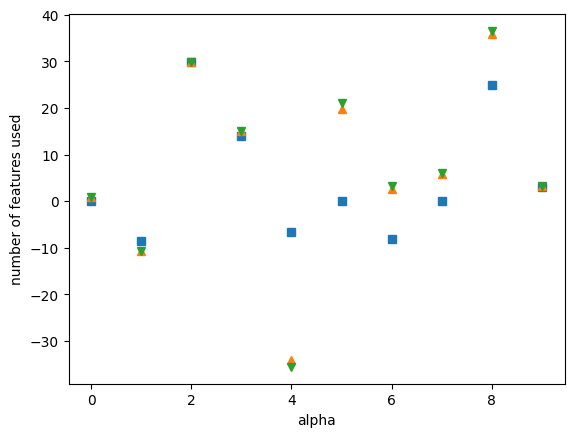

In [49]:
# Varying the regularization parameter α in the Lasso, plot the test R2 vs the number of features used (non-zero coefficients) for α = 0.01, 0.1, 1, 10. What do you observe?
# plot
import matplotlib.pyplot as plt
plt.xlabel("alpha")
plt.ylabel("number of features used")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")


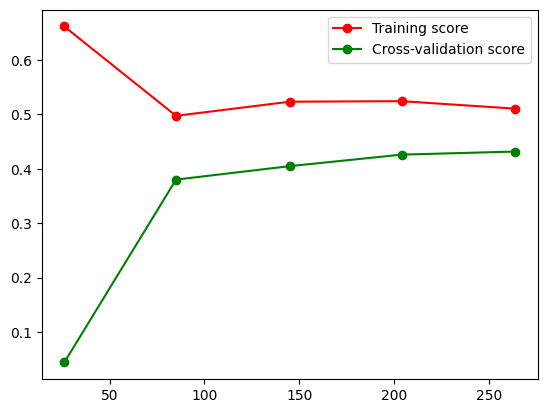

In [50]:
# plot learning curve for Lasso with alpha=0.01, 0.1, 1, 10
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.01, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")


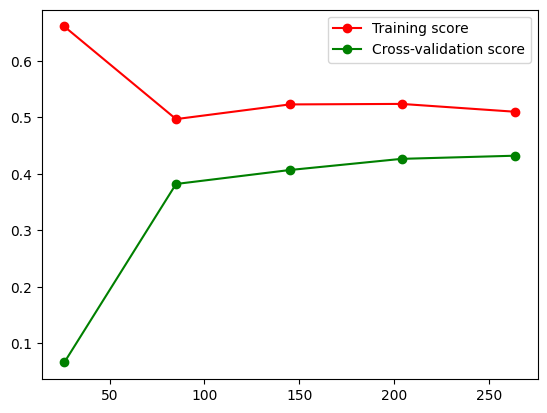

In [51]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

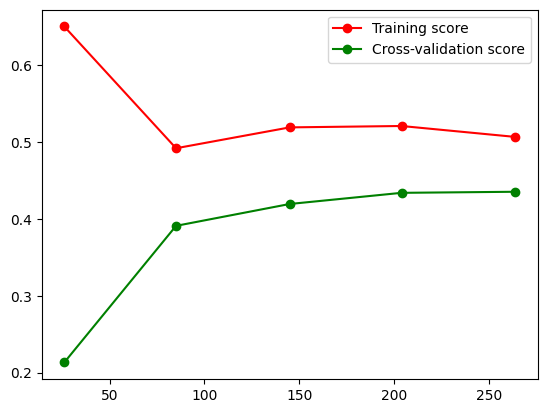

In [53]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

**Question 10**

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f"Best cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test_scaled, y_test)}")


Best cross-validation score: 0.43493178250833536
Best parameters: {'alpha': 1}
Test set score: 0.5406111447534504
